## Go Pokemon

- Introduction of the data



In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import patsy
import sklearn
import seaborn as sns

In [3]:
Pokemon = pd.read_csv("./pokemon.csv")

Pokemon.head()

#this is origin dataset from Kaggle

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


- We listed hypothesis for some questions floated in our mind...
1. What are the Pokemon stat differences/ trends from each generation? 

   Our hypothesis: We think there is a stat inflation in each newer generation (newer pokemon genertaion is better than the old pokemon generation ) 

   Lets see what is going on ...

In [4]:
Pokemon_generation = Pokemon.set_index(["generation"])
Pokemon_generation
generation=Pokemon_generation[Pokemon_generation.columns[33:39]]
generation
#Pokemon_generation.plot(y='speed', use_index=True)


,sp_attack,sp_defense,speed,type1,type2,weight_kg
generation,,,,,,
1,65,65,45,grass,poison,6.9
1,80,80,60,grass,poison,13.0
1,122,120,80,grass,poison,100.0
1,60,50,65,fire,NaN,8.5
1,80,65,80,fire,NaN,19.0
...,...,...,...,...,...,...
7,107,101,61,steel,flying,999.9
7,59,31,109,grass,steel,0.1
7,97,53,43,dark,dragon,888.0


In [4]:
generation.describe()

,sp_attack,sp_defense,speed,weight_kg
count,801.000000,801.000000,801.000000,781.000000
mean,71.305868,70.911361,66.334582,61.378105
std,32.353826,27.942501,28.907662,109.354766
min,10.000000,20.000000,5.000000,0.100000
25%,45.000000,50.000000,45.000000,9.000000
50%,65.000000,66.000000,65.000000,27.300000
75%,91.000000,90.000000,85.000000,64.800000
max,194.000000,230.000000,180.000000,999.900000


<AxesSubplot:xlabel='generation'>

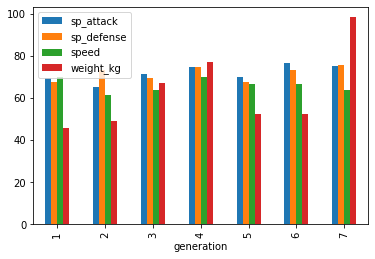

In [5]:
p1=generation.groupby(pd.Grouper(level="generation")).mean()
p1.plot.bar()

Explaination: (editing in progress)

In [5]:
Pokemon["total"] = (Pokemon["sp_attack"] +
                 Pokemon["sp_defense"] +
                 Pokemon["hp"] +
                 Pokemon["speed"]+
                 Pokemon["attack"]+
                 Pokemon["defense"])

2. What are the key differences between a pokemon type and stats? 

   We assumed that Pokemon which has more than one type has higher total stats(hp, speed, attack..etc)
   We will attempt to establish a theme of pokemon type and their distribution of stats.

In [6]:
# First, groupby type1 and type 2 "in each generation"
# code
gen1 = Pokemon[Pokemon['generation'] == 1]
gen1.head()


,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,total
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,318
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,405
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,625
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,309
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,405


In [ ]:
#plot pie(or Line) chart of the only one type

In [ ]:
#then compare 

In [9]:
 #additional part 
# two types charachters increased by each generation?
type_gen=generation.groupby("generation")["type1","type2"].count()
type_gen

/tmp/ipykernel_181/4007512940.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  type_gen=generation.groupby("generation")["type1","type2"].count()


,type1,type2
generation,,
1,151,81
2,100,49
3,135,66
4,107,54
5,156,75
6,72,41
7,80,51


<AxesSubplot:xlabel='generation'>

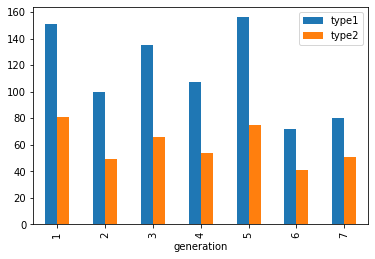

In [14]:
type_gen.plot.bar(subplots=False)

3. Linear model with different stats to do projection of same function (eg. we choose attack/defense) 

   Now we already figured out how the types affect Pokemon performance in each generation. 
   We try to predict the eighth generation (already exist tho) whether their percentage of attack increase.

In [56]:
# Before predicting, lets see what's the relationship between attack% and generation
# calculate the percentage distribution (ex: sp_attack/total) for each generation 

#adding a new column called "total"
Pokemon["total"] = (Pokemon["sp_attack"] +
                 Pokemon["sp_defense"] +
                 Pokemon["hp"] +
                 Pokemon["speed"]+
                 Pokemon["attack"]+
                 Pokemon["defense"])
Pokemon.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary,total
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,1,65,65,45,grass,poison,6.9,1,0,318
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,2,80,80,60,grass,poison,13.0,1,0,405
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,3,122,120,80,grass,poison,100.0,1,0,625
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,4,60,50,65,fire,NaN,8.5,1,0,309
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,5,80,65,80,fire,NaN,19.0,1,0,405


<AxesSubplot:xlabel='generation', ylabel='total'>

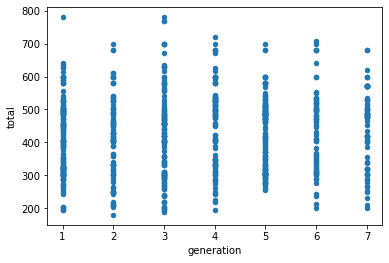

In [59]:
# make line or scatter plot in one graph 
Pokemon.plot.scatter('generation', 'total', s=None, c=None)

In [68]:
# use simple linear regression to predict the eight gen

from sklearn import (
    linear_model, metrics, neural_network, pipeline, model_selection
)

Pokemon[["name","sp_attack","sp_defense","total"]].head()


,name,sp_attack,sp_defense,total
0,Bulbasaur,65,65,318
1,Ivysaur,80,80,405
2,Venusaur,122,120,625
3,Charmander,60,50,309
4,Charmeleon,80,65,405


In [ ]:
# web scrap and create the 8th generation dataset + explain

In [ ]:
# compare our linear regression outcome and the actual outcome. Ex: Lasso regression is more accurate(?